## Machine Learning - Ex.5


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.svm import SVC  # *** NEW THING !!! ***
from pandas import *



### The Kernel trick

Generate a random sample of five 2-D points ($n=5,\ d=2$):

$$ x^{(i)}=(x_1,x_2)\in R^2\ ,\\  i=1,..,n$$

Next, map these 2-D points into a 6-D *feature-space* using the following (quadratic) mapping:

$$ \Phi(x)= (1,\sqrt 2 x_1,\sqrt 2 x_2,x_1^2,x_2^2,\sqrt 2 x_1 x_2)$$

We will calculate the **inner-products** between samples in the *feaure-space* in two ways:

(1) Explicit calculation in the 6-D *feature-space*:

 $$ G_{i,j}=\Phi(x^{(i)})\cdot\Phi(x^{(j)}) $$
 
 
(2) Using the **kernel trick** (which involves computations only in the 2-D *input-space*):

$$ K_{i,j}=\left(x^{(i)},x^{(j)}\right) \ ,\ \ K(u,v)=(1+u\cdot v)^2$$

Verify that results in both ways are indeed indentical.




In [2]:
def Kernel(u,v):
    return (1 + u.dot(v))**2
def dotProductPhiVectors(x,y):
    return np.dot(phi(x),phi(y))
def phi(x):
    sqrtoftwo = math.sqrt(2)
    return [1,sqrtoftwo*x[0],sqrtoftwo*x[1],x[0]**2,x[1]**2,sqrtoftwo*x[0]*x[1]]
def phiAll(X):
    rows = X.shape[0]
    result = []
    for i in range(0,rows):
        result += phi(X[i])
    return result
def createProductMatrix(X,func):
    rows = X.shape[0]
    M = [[0 for i in range(rows)] for j in range(rows)]
    for i in range(rows):
        for j in range(rows):
            M[i][j] = func(X[i],X[j])
    return M
n = 5

X = np.random.random((n,2))*10
G = createProductMatrix(X,dotProductPhiVectors)
K = createProductMatrix(X,Kernel)
print("the inner product of phi(X(i)) and phi(X(j)) is: ")
print(DataFrame(G))
print("the result after using the kernel trick is: ")
print(DataFrame(K))



the inner product of phi(X(i)) and phi(X(j)) is: 
             0           1             2            3           4
0   319.174716   70.328757   2062.070790   817.620715   28.925729
1    70.328757   22.103650    390.830176    75.543022    7.031544
2  2062.070790  390.830176  14144.560133  6409.870112  166.823870
3   817.620715   75.543022   6409.870112  7657.495749  113.748630
4    28.925729    7.031544    166.823870   113.748630    5.234659
the result after using the kernel trick is: 
             0           1             2            3           4
0   319.174716   70.328757   2062.070790   817.620715   28.925729
1    70.328757   22.103650    390.830176    75.543022    7.031544
2  2062.070790  390.830176  14144.560133  6409.870112  166.823870
3   817.620715   75.543022   6409.870112  7657.495749  113.748630
4    28.925729    7.031544    166.823870   113.748630    5.234659


### Linear SVM

In this exercise we will use 'sklearn' library's implementation of the SVM classifier:

<http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>

Use their SVC module to train a linear SVM classifier on the following (linearly seperable) points.

Set the SVC parameters with kernel='linear' and C=1000.

Use the 'predict' method to count how many examples were misclassified.

Use the 'decision_function' method to visualize decision function $Z(x_1,x_2)$ (using plt.contour function)

Mark the decision boundary $Z=0$ and the margin lines: $Z=-1$ and $Z=1$.

Use the 'support_' attribute to mark the support-vectors.

Hint: <http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html>

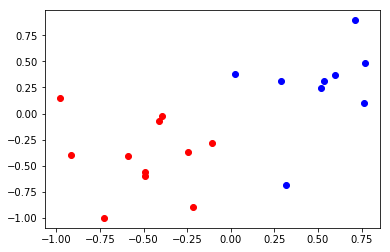

SVM RESULT
the number of points missclassified:  0.0


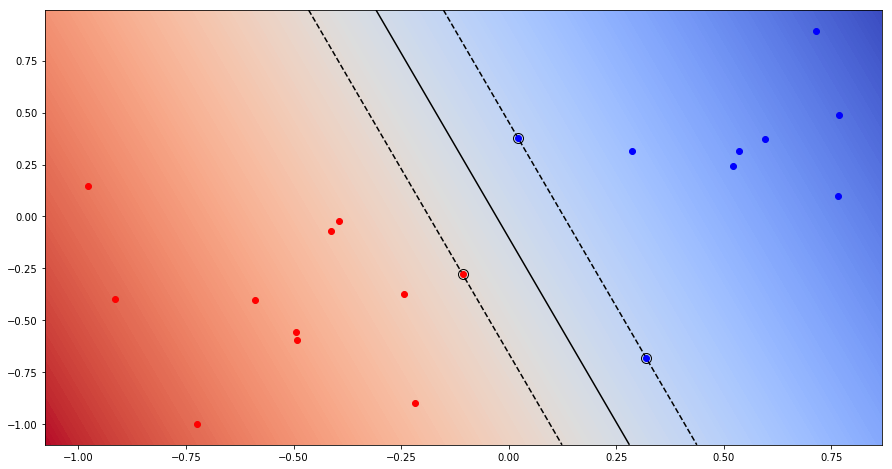

In [3]:
N = 20
x = np.random.random((N,2))*2-1
w = np.array([3,1])
z = np.dot(x,w)
y = np.sign(z)

plt.plot(x[y==-1,0],x[y==-1,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
plt.show()
# your code here..
clf = SVC(C=1000, kernel='linear')
clf.fit(x, y) 
y_hat = clf.predict(x)

x_min = x[:, 0].min() - 0.1
x_max = x[:, 0].max() + 0.1
y_min = x[:, 1].min() - 0.1
y_max = x[:, 1].max() + 0.1
plt.figure(figsize=(15,8))
xspace = np.linspace(x_min,x_max,10)
yspace = np.linspace(y_min,y_max,10)
XX, YY = np.meshgrid(xspace,yspace)
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
missMatches = y - y_hat
print("SVM RESULT")
print("the number of points missclassified: ", np.sum(missMatches))
plt.plot(x[clf.support_,0],x[clf.support_,1], 'o', markerfacecolor="none", markeredgecolor="black", markersize = 10)
plt.plot(x[y==-1,0],x[y==-1,1],'or')
plt.plot(x[y==1,0],x[y==1,1],'ob')
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z ,255, cmap="coolwarm_r")
plt.contour(XX, YY, Z , colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.show()


### Nonlinear SVM

Load the data points the file 'nonlinear.csv'. 

Clearly, these points are not linearly seperable in their 2-D *input space*. We will use the SVM classifier with RBF kernel to classify them in the *feature-space* (induced by the RBF kernel).

Set the SVC parameters with kernel='linear' and C=1000, and try different values of the gamma parameter until you are satisfied with the results (e.g., count misclassification, and inspect the location of the support vectors).

Visualize the results in the same way as before.


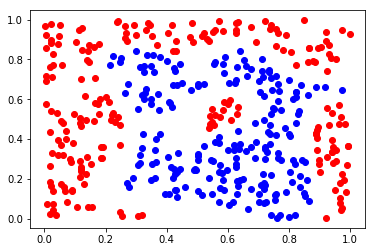

SVM RESULT
the number of points missclassified:  0.0


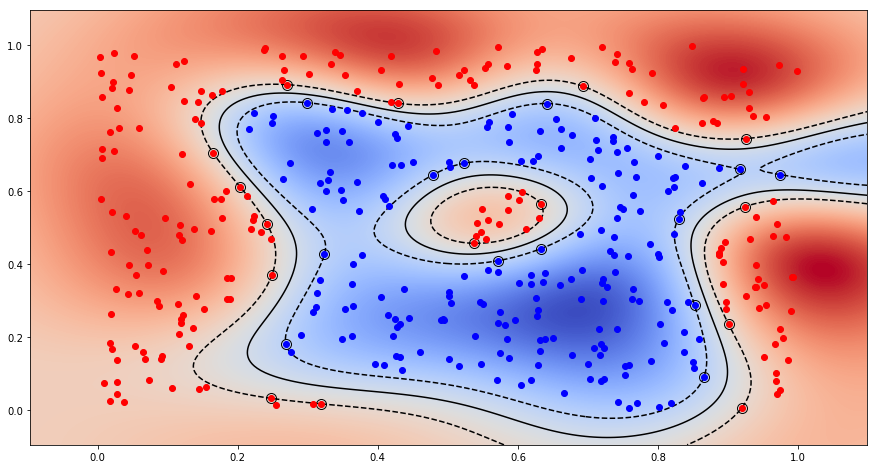

In [4]:
data=np.loadtxt('nonlinear.csv', delimiter=',')
x = data[:,0:2]
y = data[:,2]
plt.plot(x[y==-1,0],x[y==-1,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')
plt.show()

#....code...
clf = SVC(C=1000, kernel='rbf',gamma=18)
clf.fit(x, y) 
y_hat = clf.predict(x)

x_min = x[:, 0].min() - 0.1
x_max = x[:, 0].max() + 0.1
y_min = x[:, 1].min() - 0.1
y_max = x[:, 1].max() + 0.1
plt.figure(figsize=(15,8))
xspace = np.linspace(x_min,x_max,200)
yspace = np.linspace(y_min,y_max,200)
XX, YY = np.meshgrid(xspace,yspace)
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
missMatches = y - y_hat
print("SVM RESULT")
print("the number of points missclassified: ", np.sum(missMatches))
plt.plot(x[clf.support_,0],x[clf.support_,1], 'o', markerfacecolor="none", markeredgecolor="black", markersize = 10)
plt.plot(x[y==-1,0],x[y==-1,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z ,500, cmap="coolwarm")
plt.contour(XX, YY, Z , colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.show()


## Good luck !